<a href="https://colab.research.google.com/github/MANSI-UPRETI/ds_mansi_upreti/blob/main/notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import files
uploaded = files.upload()

Saving historical_data.csv to historical_data.csv
Saving fear_greed_index.csv to fear_greed_index.csv


In [3]:
import pandas as pd
trader_data = pd.read_csv("historical_data.csv")
fear_greed = pd.read_csv("fear_greed_index.csv")

In [4]:
trader_data['Timestamp IST'] = pd.to_datetime(trader_data['Timestamp IST'], format="%d-%m-%Y %H:%M")
fear_greed['date'] = pd.to_datetime(fear_greed['date'])

In [5]:
trader_data['date'] = trader_data['Timestamp IST'].dt.date
daily_trading_volume = trader_data.groupby('date')['Size USD'].sum().reset_index()
daily_trading_volume['date'] = pd.to_datetime(daily_trading_volume['date'])
merged_data = pd.merge(daily_trading_volume, fear_greed[['date', 'value', 'classification']], on='date', how='inner')

In [6]:
!pip install matplotlib seaborn

In [7]:
trader_data['date'] = trader_data['Timestamp IST'].dt.date
fear_greed['date'] = fear_greed['date'].dt.date

merged_df = pd.merge(trader_data, fear_greed, on='date', how='left')


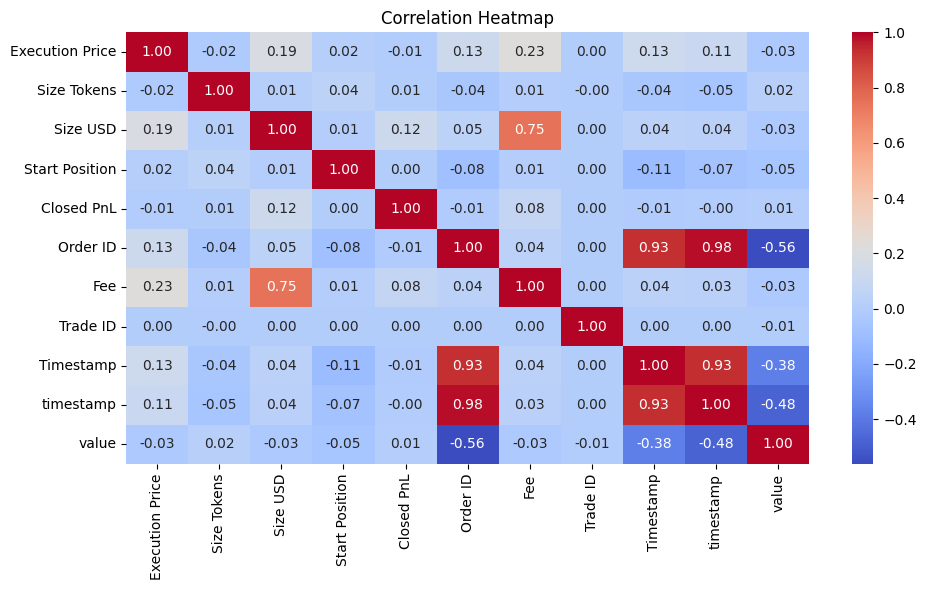

In [9]:
numeric_cols = merged_df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.savefig("heatmap.png")
plt.show()

In [12]:
merged_df = pd.merge(trader_data, fear_greed, on='date', how='left')


/tmp/ipython-input-14-3551546600.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_size_usd = merged_df.groupby('FGI_Level')['Size USD'].mean().reset_index()
/tmp/ipython-input-14-3551546600.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_size_usd, x='FGI_Level', y='Size USD', palette='Set2')


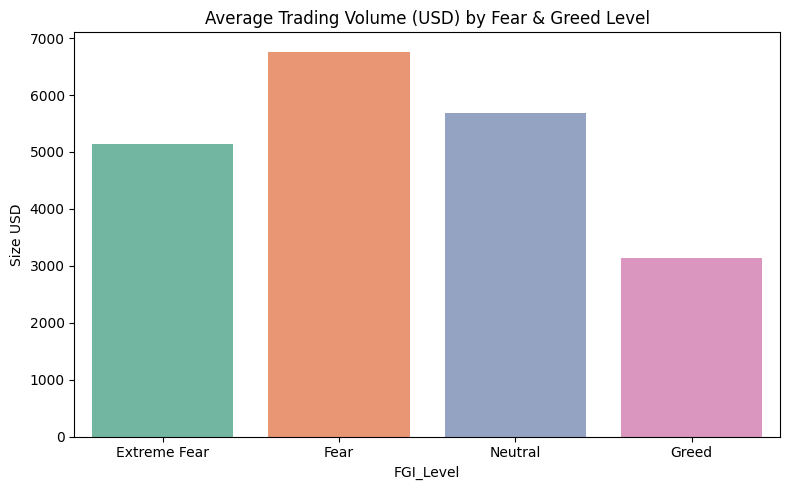

In [14]:
merged_df['FGI_Level'] = pd.cut(merged_df['value'], bins=[0, 25, 50, 75, 100],
                                labels=['Extreme Fear', 'Fear', 'Neutral', 'Greed'])

avg_size_usd = merged_df.groupby('FGI_Level')['Size USD'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_size_usd, x='FGI_Level', y='Size USD', palette='Set2')
plt.title("Average Trading Volume (USD) by Fear & Greed Level")
plt.tight_layout()
plt.savefig("fgi_level.png")
plt.show()


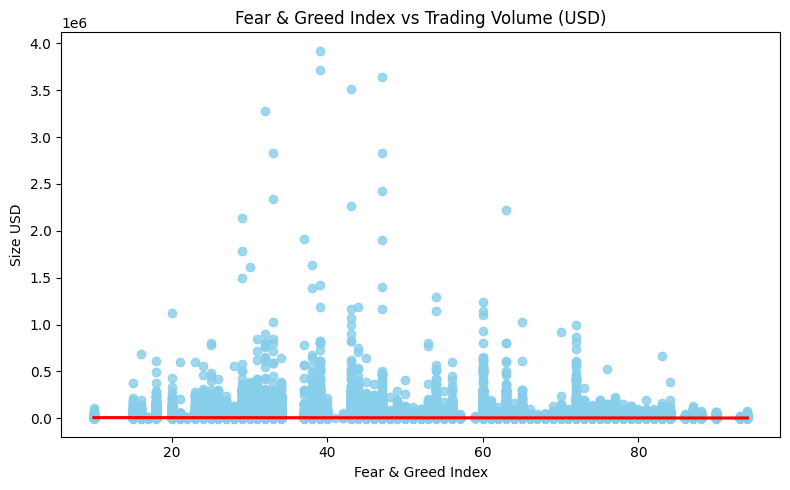

In [15]:
plt.figure(figsize=(8, 5))
sns.regplot(data=merged_df, x='value', y='Size USD', scatter_kws={"color": "skyblue"}, line_kws={"color": "red"})
plt.title("Fear & Greed Index vs Trading Volume (USD)")
plt.xlabel("Fear & Greed Index")
plt.ylabel("Size USD")
plt.tight_layout()
plt.savefig("fgi_vs_sizeusd_regression.png")
plt.show()
